# Introduction:
A typical 4G network consists of several nodes connected to each other, where each node serves
users in the surrounding area. While users are accessing network services, their mobile phones
record Key Performance Indicators (KPI’s) which can help network operators in assessing their
quality of service.

There are many KPI’s which evaluate different aspects of the network. For example, RSRP
(Reference Signals Received Power) is a KPI which measures the network coverage in the user’s
location. Traffic Volume is another KPI which measures how much data has been consumed by the
user.

# Importing tools:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# The wordclouds lib
from wordcloud import WordCloud

# the plotting libs
import holoviews as hv
from holoviews.operation.datashader import datashade, inspect, rasterize
# colour maps lib
import colorcet as cc
# a lib for plotting a large dataset
import datashader as ds
from datashader.utils import lnglat_to_meters
# panel lib for widgets
import panel as pn
pn.extension()
hv.extension('bokeh')

# Reading Data:

In [2]:
RSRP_data = pd.read_csv("RSRP.csv")
Traffic_volumn_data = pd.read_csv("TrafficVolume.csv")

# EDA & Data Cleaning:

In [3]:
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
1  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
2  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
3  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
4  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
5  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
6  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
7  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
8  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   
9  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   

  RadioConnectionType       Country RadioNetworkGeneration RadioOperatorName  \
0              Mobile  Saudi Arabia                     4G        Operator C   
1              Mobile  Saudi Arabia                     4G        Operator C   
2              Mobile  Saudi Arabia                     3G        Operator C   
3              Mobile  Saudi Arabia                     3G        Operator C   
4              Mobile  Saudi Arabia                     4G        Operator C   
5              Mobile  Saudi Arabia                     4G        Operator C   
6              Mobile  Saudi Arabia                     3G        Operator C   
7              Mobile  Saudi Arabia                     3G        Operator C   
8              Mobile  Saudi Arabia                     2G        Operator C   
9              Mobile  Saudi Arabia                     2G        Operator C   

         RSRP RadioMobileDataEnabled DeviceManufacturer           DeviceName  
0  2147483647                Enabled                HTC                D728W  
1  2147483647                Enabled                HTC  Desire 728 Dual Sim  
2  2147483647                Enabled                HTC                D728W  
3  2147483647                Enabled                HTC  Desire 728 Dual Sim  
4  2147483647                Enabled                HTC                D728W  
5  2147483647                Enabled                HTC  Desire 728 Dual Sim  
6  2147483647                Enabled                HTC                D728W  
7  2147483647                Enabled                HTC  Desire 728 Dual Sim  
8  2147483647                Enabled                HTC                D728W  
9  2147483647                Enabled                HTC  Desire 728 Dual Sim

In [4]:
RSRP_data.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
455492   2019-11-03 08:35:38.024 +0300         24.577492          46.632294   
1392535  2019-11-03 18:10:44.001 +0300         24.696619          46.618730   
2612058  2019-11-04 18:20:41.052 +0300         24.807344          46.769910   
279165   2019-11-02 05:05:00.001 +0300         24.832360          46.759660   
115700   2019-11-02 13:42:01.000 +0300         24.670270          46.622543   
820108   2019-11-03 19:18:13.000 +0300         24.832537          46.759624   
1043444  2019-11-02 21:14:24.999 +0300         24.778093          46.729797   
1801523  2019-11-04 20:46:42.001 +0300         24.813625          46.634483   
836074   2019-11-02 23:24:33.001 +0300         24.787868          46.666515   
291413   2019-11-02 08:40:33.582 +0300         24.750637          46.858780   
652      2019-11-02 00:00:16.001 +0300         24.792900          46.820675   
123732   2019-11-02 13:28:57.000 +0300         24.586193          46.698500   
968212   2019-11-02 12:37:45.291 +0300         24.755510          46.630573   
1486199  2019-11-03 08:31:52.999 +0300         24.727346          46.689790   
803555   2019-11-03 08:21:20.025 +0300         24.662342          46.561398   
1235375  2019-11-03 12:50:00.000 +0300         24.871443          46.637210   
2095625  2019-11-03 15:23:55.000 +0300         24.540102          46.897514   
1474140  2019-11-03 18:42:57.003 +0300         24.687151          46.633260   
1167064  2019-11-02 21:52:44.000 +0300         24.763462          46.747510   
703286   2019-11-03 13:32:36.027 +0300         24.679987          46.654457   

        RadioConnectionType       Country RadioNetworkGeneration  \
455492               Mobile  Saudi Arabia                     4G   
1392535              Mobile  Saudi Arabia                     4G   
2612058              Mobile  Saudi Arabia                     3G   
279165               Mobile  Saudi Arabia                     4G   
115700               Mobile  Saudi Arabia                     4G   
820108               Mobile  Saudi Arabia                     4G   
1043444              Mobile  Saudi Arabia                     4G   
1801523              Mobile  Saudi Arabia                     4G   
836074               Mobile  Saudi Arabia                     4G   
291413               Mobile  Saudi Arabia                     3G   
652                  Mobile  Saudi Arabia                     4G   
123732               Mobile  Saudi Arabia                     4G   
968212               Mobile  Saudi Arabia                     4G   
1486199              Mobile  Saudi Arabia                     4G   
803555               Mobile  Saudi Arabia                     3G   
1235375              Mobile  Saudi Arabia                     3G   
2095625              Mobile  Saudi Arabia                     4G   
1474140              Mobile  Saudi Arabia                     4G   
1167064              Mobile  Saudi Arabia                     4G   
703286                 WiFi  Saudi Arabia                     4G   

        RadioOperatorName        RSRP RadioMobileDataEnabled  \
455492         Operator A         -69                Enabled   
1392535        Operator C         -77                Enabled   
2612058        Operator B  2147483647                Enabled   
279165         Operator C         -70                Enabled   
115700         Operator C         -87                Enabled   
820108         Operator C         -68                Enabled   
1043444        Operator A         -92                Enabled   
1801523        Operator A         -94                Enabled   
836074         Operator C         -88                Enabled   
291413         Operator A  2147483647                Enabled   
652            Operator C         -71                Enabled   
123732         Operator A  2147483647                Enabled   
968212         Operator C         -89                Enabled   
1486199        Operator A         -46       

In [5]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


In [6]:
# let's look at the 'Country' column, seems all the values are Saudi Arabia
RSRP_data["Country"].value_counts()

Saudi Arabia    2725197
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain much information.**

In [7]:
#There only one value in the Country column, it's better to remove that column to simplify our data
RSRP_data.drop("Country", axis=1, inplace=True)

In [8]:
# let's look at the 'RadioConnectionType' column, seems all the values are Mobile
RSRP_data["RadioConnectionType"].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

**Note:**
We have way more mobile instances than the other but still we can't delete the column like we did before.

In [9]:
RSRP_data["RadioMobileDataEnabled"].value_counts()

Enabled     2724635
Disabled        718
Name: RadioMobileDataEnabled, dtype: int64

**Again**, there is a class that is dominating and a few instances of the other.
We can't drop this column too, but data must be prepared if a classification will be used becuase of how skwed our dataset is towards a specific class. 

In [10]:
# let's take a look at the RadioNetworkGeneration
RSRP_data["RadioNetworkGeneration"].value_counts()

4G         2257240
3G          445246
Unknown      17361
2G            5464
WiFi            42
Name: RadioNetworkGeneration, dtype: int64

**4G domination!**

In [11]:
# let's take a look at the manufacturer
RSRP_data["DeviceManufacturer"].value_counts()

samsung       2404478
HUAWEI         111972
HTC             36046
LGE             30428
Xiaomi          25612
HMD Global      23497
motorola        19909
LENOVO          18679
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Lenovo           5862
Sony             4040
lenovo           3517
Realme           1760
realme           1598
PANASONIC        1224
QMobile           723
htc               578
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**There are things to notice here:**
- Samsung domination!
- Some manufacturer have different names for example: there's ( **Realme**, **realme** | **Lenovo**, **lenovo**, **LENOVO** | **HTC**, **htc** ). If we wish we can even join Realme, vivo, Oppo into one category since these belong to a single company.
- Another thing to notice here is the LGE manufacturer, this refers to the LG company. 


*Let's rename this to the most common name and name the duplicates with one exact name.*

In [12]:
RSRP_data["DeviceManufacturer"].replace("Realme", "realme", inplace=True)
RSRP_data["DeviceManufacturer"].replace("lenovo", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LENOVO", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("htc", "HTC", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LGE", "LG", inplace=True)
RSRP_data["DeviceManufacturer"].replace("samsung", "SAMSUNG", inplace=True)

In [13]:
RSRP_data["DeviceManufacturer"].value_counts()

SAMSUNG       2404478
HUAWEI         111972
HTC             36624
LG              30428
Lenovo          28058
Xiaomi          25612
HMD Global      23497
motorola        19909
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Sony             4040
realme           3358
PANASONIC        1224
QMobile           723
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**Now Lenovo is looking big!**

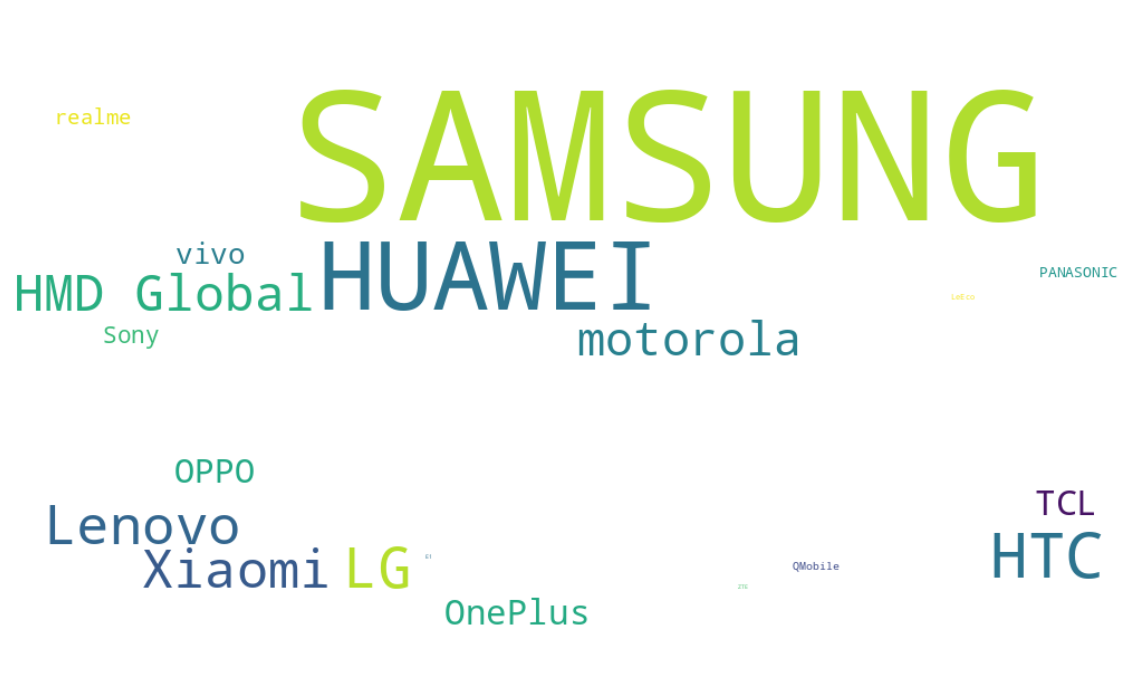

In [14]:
# Another way of plotting these values is by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceManufacturer"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This visual shows how each class weight in a simple visualization.

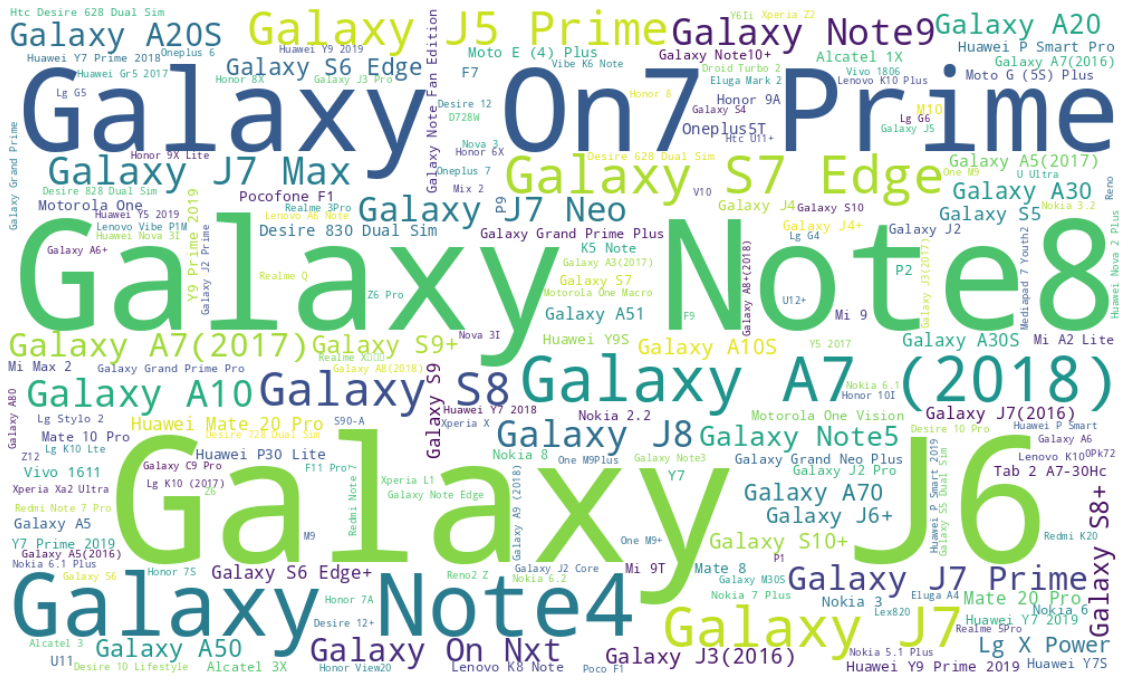

In [15]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now**, the *'Timestamp'* column must be converted ti the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The formate of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [16]:
# Now let's convert the TimeStamp column to datetime type in pandas, the 'utc' parameter is essential here for this to work!
RSRP_data["Timestamp"] = pd.to_datetime(RSRP_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)

In [17]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     object             
 4   RadioNetworkGeneration  object             
 5   RadioOperatorName       object             
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  object             
 8   DeviceManufacturer      object             
 9   DeviceName              object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 207.9+ MB


Looking at the Timestamp column, the dtype of Timestamp is now a datetime type

Now let's check our numerical fields to check that they are in the valid range

The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [18]:
RSRP_data[(RSRP_data['LocationLatitude'] > 90) | (RSRP_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [19]:
RSRP_data[(RSRP_data['LocationLongitude'] > 180) | (RSRP_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

There something weird with the RSRP column here, there's a very big positive value and the rest are small negative ones.

The valid range for RSRP is [-44,-140]
Let's look up the invalid values.

In [20]:
RSRP_data_invalid = RSRP_data[(RSRP_data['RSRP'] > -44) | (RSRP_data['RSRP'] < -140)]
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 2147483647]

Timestamp  LocationLatitude  LocationLongitude  \
0       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
1       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
2       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
3       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
4       2019-11-01 21:11:26.822000+00:00         24.540540          46.784737   
...                                  ...               ...                ...   
2724318        2019-11-02 15:59:42+00:00         24.723953          46.669780   
2725269 2019-11-03 08:35:23.171000+00:00         24.812200          46.752940   
2725270 2019-11-03 08:35:32.550000+00:00         24.812200          46.752940   
2725316 2019-11-03 13:50:06.017000+00:00         24.812235          46.752796   
2725325 2019-11-03 14:25:19.527000+00:00         24.812230          46.752800   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
0                    Mobile                     4G        Operator C   
1                    Mobile                     4G        Operator C   
2                    Mobile                     3G        Operator C   
3                    Mobile                     3G        Operator C   
4                    Mobile                     4G        Operator C   
...                     ...                    ...               ...   
2724318              Mobile                     4G        Operator C   
2725269              Mobile                     3G        Operator A   
2725270              Mobile                     4G        Operator A   
2725316              Mobile                     3G        Operator A   
2725325              Mobile                     3G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
0        2147483647                Enabled                HTC   
1        2147483647                Enabled                HTC   
2        2147483647                Enabled                HTC   
3        2147483647                Enabled                HTC   
4        2147483647                Enabled                HTC   
...             ...                    ...                ...   
2724318  2147483647                Enabled            SAMSUNG   
2725269  2147483647                Enabled            SAMSUNG   
2725270  2147483647                Enabled            SAMSUNG   
2725316  2147483647                Enabled            SAMSUNG   
2725325  2147483647                Enabled            SAMSUNG   

                  DeviceName  
0                      D728W  
1        Desire 728 Dual Sim  
2                      D728W  
3        Desire 728 Dual Sim  
4                      D728W  
...                      ...  
2724318        Galaxy On Nxt  
2725269          Galaxy A20S  
2725270          Galaxy A20S  
2725316          Galaxy A20S  
2725325          Galaxy A20S  

[643705 rows x 10 columns]

***A huge number of invalid data points for RSRP values, however it's better not to drop these datapoints now, these rows still contain useful information that we can use.***

This data contains longtitude and latitude, we were informed that this data is from Saudi Arabia, but we don't know which part of Saudi Arabia. These points can be plotted and using a refrence point (drawn using a red traingle) and google maps or openstreetmaps, we can find the area from which this data came.

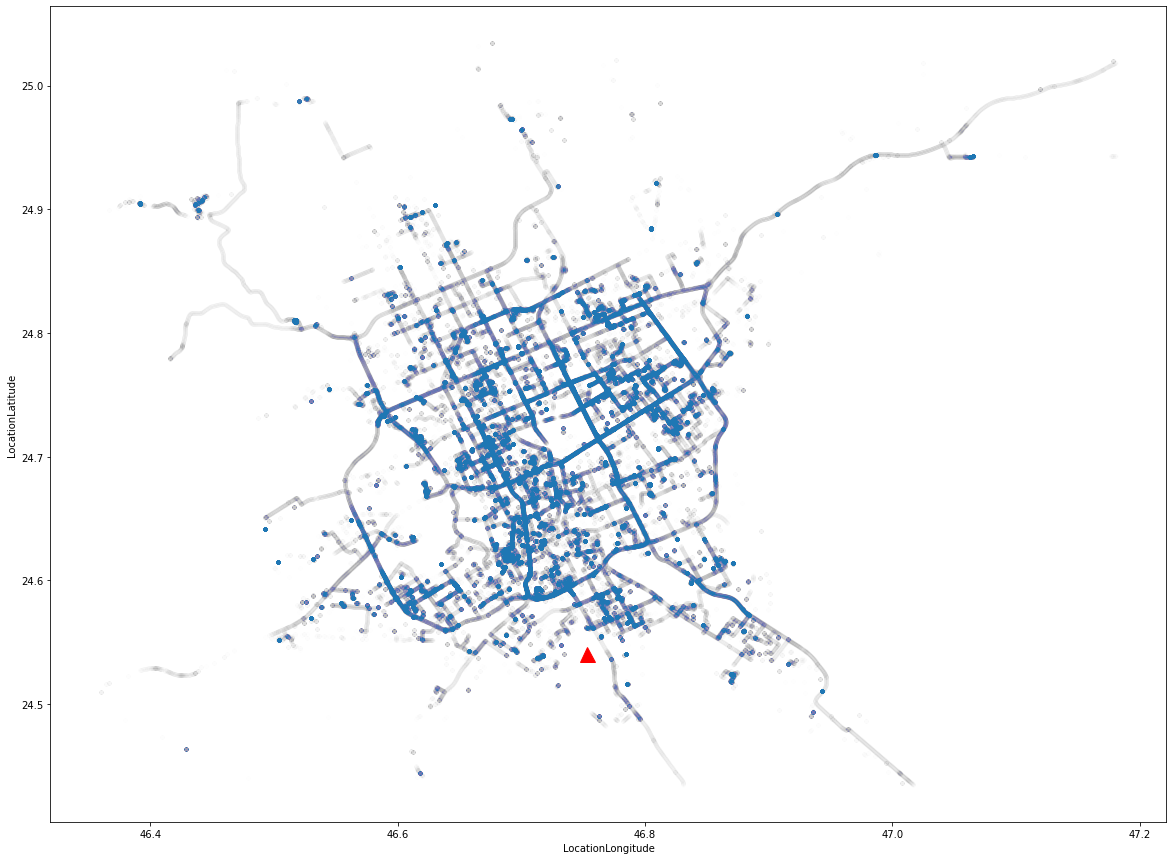

In [21]:
RSRP_data_invalid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***By looking at the google maps and using the red point as a refrence point we can see that this is map of Riyad city.***
<img src="riyad.png"/>

*Now let's look at our valid data:*

In [22]:
RSRP_data_valid = RSRP_data[(RSRP_data['RSRP'] < -44) & (RSRP_data['RSRP'] > -140)]
RSRP_data_valid.sample(40)

Timestamp  LocationLatitude  LocationLongitude  \
1494588 2019-11-03 18:33:48.017000+00:00         24.579320          46.666610   
1653215        2019-11-04 04:35:28+00:00         24.681458          46.720795   
979788  2019-11-03 02:37:38.051000+00:00         24.596722          46.680700   
722482         2019-11-03 12:31:51+00:00         24.787773          46.858593   
2101712 2019-11-03 16:12:11.045000+00:00         24.587475          46.759884   
1769600 2019-11-03 13:51:46.147000+00:00         24.675228          46.669308   
1225012 2019-11-03 06:52:27.001000+00:00         24.634758          46.532260   
2083855        2019-11-03 14:54:46+00:00         24.768402          46.678684   
2381407        2019-11-04 14:39:29+00:00         24.561045          46.866370   
2175850        2019-11-03 10:32:18+00:00         24.844604          46.674610   
1169689 2019-11-02 22:33:37.030000+00:00         24.592533          46.715485   
404947  2019-11-03 16:18:16.999000+00:00         24.803383          46.715183   
942998  2019-11-02 13:19:07.055000+00:00         24.776768          46.789500   
53959   2019-11-02 04:58:58.031000+00:00         24.596642          46.680668   
2036218 2019-11-03 22:44:46.034000+00:00         24.592415          46.715530   
2559300 2019-11-04 05:02:13.999000+00:00         24.734392          46.648643   
642002         2019-11-03 11:10:22+00:00         24.724190          46.680683   
1876362        2019-11-03 15:52:02+00:00         24.674055          46.681640   
266040         2019-11-02 02:31:31+00:00         24.832506          46.759586   
807829         2019-11-02 19:26:26+00:00         24.843752          46.867905   
1770826        2019-11-03 15:16:27+00:00         24.766480          46.734917   
1568578 2019-11-03 14:26:03.052000+00:00         24.575870          46.767757   
884077  2019-11-03 05:36:49.001000+00:00         24.680767          46.638930   
2533767 2019-11-04 13:14:03.029000+00:00         24.692610          46.650124   
1883869 2019-11-03 21:18:14.097000+00:00         24.618286          46.680164   
1915014 2019-11-03 15:46:00.990000+00:00         24.732523          46.826830   
2176424 2019-11-03 10:56:52.001000+00:00         24.811321          46.619812   
132176  2019-11-02 19:02:09.040000+00:00         24.594381          46.720250   
676730  2019-11-02 16:18:37.128000+00:00         24.762987          46.812637   
2517002 2019-11-04 14:28:54.023000+00:00         24.736195          46.684284   
734416         2019-11-03 06:42:27+00:00         24.804342          46.716890   
507115  2019-11-03 07:10:31.025000+00:00         24.593555          46.713840   
2275712        2019-11-04 17:32:30+00:00         24.805626          46.680300   
2549311 2019-11-04 19:02:24.058000+00:00         24.777992          46.735180   
1754483 2019-11-03 14:58:29.093000+00:00         24.640600          46.791900   
757182  2019-11-03 11:32:05.066000+00:00         24.802036          46.673473   
2044269 2019-11-04 04:02:58.376000+00:00         24.769846          46.658695   
1190473        2019-11-03 16:54:39+00:00         24.763120          46.693460   
1869094 2019-11-04 09:19:09.026000+00:00         24.779583          46.790550   
1860856 2019-11-03 13:55:20.064000+00:00         24.678843          46.702080   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
1494588              Mobile                     4G        Operator A   -77   
1653215              Mobile                     4G        Operator C   -93   
979788               Mobile                     4G        Operator A   -71   
722482               Mobile                     4G        Operator A   -94   
2101712              Mobile                     4G        Operator B   -76   
1769600              Mobile                     4G        Operator C   -82   
1225012              Mobile                     4G        Operator A   -68   
2083855              Mobile                     4G        Operator C   -69   
2381407

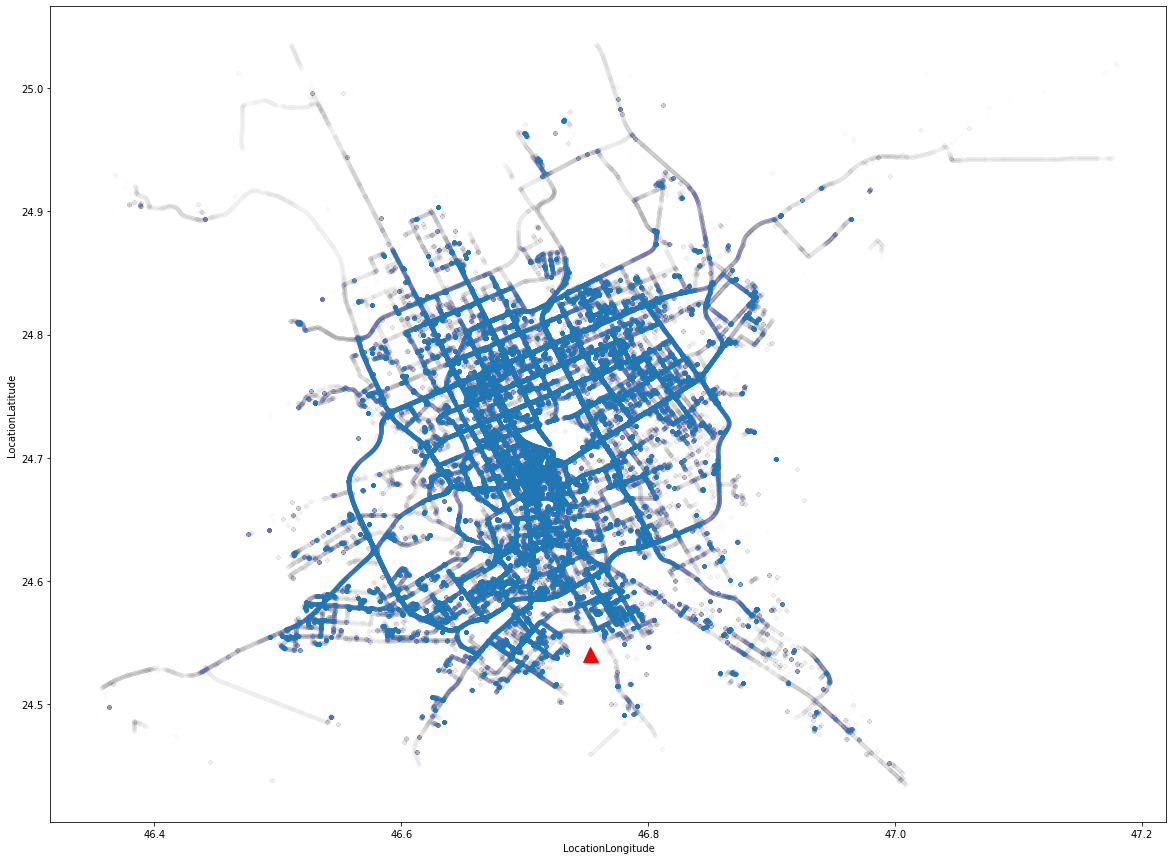

In [23]:
RSRP_data_valid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***Another map of Riyad.***

We can see that the devices with the invalid RSRP value are distributed as much as the ones with a valid RSRP value, i.e there's no areas which appear on a map but not the other. We can't link these invalid values to a certain area or location, furthur investegation is needed.

In [24]:
RSRP_data_invalid.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
941628  2019-11-02 14:42:08.021000+00:00         24.857716          46.841380   
636635  2019-11-02 17:18:22.775000+00:00         24.765696          46.665210   
2570630 2019-11-04 05:28:51.034000+00:00         24.687525          46.684270   
1271170 2019-11-03 04:06:46.001000+00:00         24.681839          46.696877   
1848560 2019-11-03 16:18:08.052000+00:00         24.587357          46.763077   
1265366 2019-11-03 08:18:52.999000+00:00         24.687294          46.704350   
1629969 2019-11-03 19:53:32.023000+00:00         24.728188          46.820038   
1020877 2019-11-03 07:07:02.030000+00:00         24.815083          46.681007   
2654453        2019-11-04 09:00:16+00:00         24.739738          46.725290   
1637890 2019-11-03 15:01:20.033000+00:00         24.625180          46.705334   
1479341 2019-11-03 17:45:18.999000+00:00         24.767868          46.734966   
658959         2019-11-02 03:49:24+00:00         24.754030          46.562668   
2130180        2019-11-03 17:36:53+00:00         24.685450          46.685806   
613774  2019-11-03 18:24:05.082000+00:00         24.782574          46.684340   
153423  2019-11-02 07:03:46.028000+00:00         24.921827          46.726414   
2633691 2019-11-04 16:16:50.001000+00:00         24.809755          46.517056   
448028  2019-11-02 14:06:50.021000+00:00         24.806778          46.769897   
2466142 2019-11-04 13:52:31.056000+00:00         24.618770          46.686490   
2367358 2019-11-04 14:37:10.023000+00:00         24.638200          46.586132   
2598347 2019-11-04 09:53:53.026000+00:00         24.767273          46.734990   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
941628               Mobile                     3G        Operator A   
636635               Mobile                     4G        Operator A   
2570630              Mobile                     3G        Operator A   
1271170              Mobile                     3G        Operator B   
1848560              Mobile                     4G        Operator B   
1265366              Mobile                     3G        Operator C   
1629969              Mobile                     3G        Operator B   
1020877              Mobile                     3G        Operator B   
2654453              Mobile                     3G        Operator A   
1637890              Mobile                     3G        Operator A   
1479341              Mobile                     3G        Operator A   
658959               Mobile                     4G        Operator B   
2130180              Mobile                     3G        Operator A   
613774               Mobile                     3G        Operator A   
153423               Mobile                Unknown        Operator B   
2633691              Mobile                     3G        Operator C   
448028               Mobile                     3G        Operator B   
2466142              Mobile                     3G        Operator A   
2367358              Mobile                     3G        Operator A   
2598347              Mobile                     4G        Operator C   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
941628   2147483647                Enabled            SAMSUNG   
636635   2147483647                Enabled            SAMSUNG   
2570630  2147483647                Enabled            SAMSUNG   
1271170  2147483647                Enabled            SAMSUNG   
1848560  2147483647                Enabled            SAMSUNG   
1265366  2147483647                Enabled            SAMSUNG   
1629969  2147483647                Enabled            SAMSUNG   
1020877  2147483647                Enabled            SAMSUNG   
2654453  2147483647                Enabled            SAMSUNG   
1637890  2147483647                Enabled            SAMSUNG   
1479341  2147483647                Enabled            SAMSUNG   
658959   2147483647                E

In [25]:
RSRP_data_invalid["DeviceManufacturer"].value_counts()

SAMSUNG       598200
Lenovo         12956
HUAWEI         10099
motorola        4743
HTC             3876
LG              3025
OnePlus         2547
HMD Global      2442
Sony            1934
Xiaomi          1199
OPPO             855
vivo             546
QMobile          535
PANASONIC        496
TCL              324
realme           168
E1               135
Hisense           40
OBI                9
Mione              9
Infinix            8
ZTE                6
LAVA               6
SHARP              5
Name: DeviceManufacturer, dtype: int64

By looking at these numbers and the number for the whole dataset, the issue seems to be happening across all types of devices and not specific to a type. The order of the devices manufacturer is almost the same.

In [26]:
RSRP_data_invalid['RSRP'].value_counts()

 2147483647    643705
 0                455
-1                  2
 12                 1
Name: RSRP, dtype: int64

In [27]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0].sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
9853    2019-11-02 11:24:02.042000+00:00         24.831526          46.611263   
9844    2019-11-02 11:23:15.007000+00:00         24.831718          46.608960   
9928    2019-11-02 11:29:33.087000+00:00         24.832880          46.581413   
10047   2019-11-02 11:35:40.053000+00:00         24.826994          46.565285   
10012   2019-11-02 11:34:19.039000+00:00         24.826890          46.564710   
157139  2019-11-02 11:29:42.111000+00:00         24.832214          46.579884   
157112  2019-11-02 11:24:05.036000+00:00         24.831253          46.611393   
141829  2019-11-02 11:26:10.042000+00:00         24.819965          46.597946   
9875    2019-11-02 11:25:40.020000+00:00         24.821938          46.602590   
157174  2019-11-02 14:30:58.022000+00:00         24.630568          46.718330   
10075   2019-11-02 14:31:48.025000+00:00         24.629898          46.717045   
9981    2019-11-02 11:32:10.064000+00:00         24.827517          46.566227   
9902    2019-11-02 11:27:42.101000+00:00         24.827757          46.591873   
1547421 2019-11-04 14:38:29.491000+00:00         24.637589          46.710840   
10057   2019-11-02 14:30:44.024000+00:00         24.630713          46.718685   
9931    2019-11-02 11:29:41.051000+00:00         24.832289          46.580060   
141900  2019-11-02 11:29:27.037000+00:00         24.833345          46.582480   
300050  2019-11-02 14:30:46.026000+00:00         24.630707          46.718660   
142054  2019-11-02 14:31:20.032000+00:00         24.630281          46.717773   
10018   2019-11-02 11:34:30.032000+00:00         24.826887          46.564720   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
9853                 Mobile                     4G        Operator A     0   
9844                 Mobile                     4G        Operator A     0   
9928                 Mobile                     4G        Operator A     0   
10047                Mobile                     4G        Operator A     0   
10012                Mobile                     4G        Operator A     0   
157139               Mobile                     4G        Operator A     0   
157112               Mobile                     4G        Operator A     0   
141829               Mobile                     4G        Operator A     0   
9875                 Mobile                     4G        Operator A     0   
157174               Mobile                     4G        Operator A     0   
10075                Mobile                     4G        Operator A     0   
9981                 Mobile                     4G        Operator A     0   
9902                 Mobile                     4G        Operator A     0   
1547421              Mobile                     3G        Operator B     0   
10057                Mobile                     4G        Operator A     0   
9931                 Mobile                     4G        Operator A     0   
141900               Mobile                     4G        Operator A     0   
300050               Mobile                     4G        Operator A     0   
142054               Mobile                     4G        Operator A     0   
10018                Mobile                     4G        Operator A     0   

        RadioMobileDataEnabled DeviceManufacturer DeviceName  
9853                   Enabled             HUAWEI       Y6Ii  
9844                   Enabled             HUAWEI       Y6Ii  
9928                   Enabled             HUAWEI       Y6Ii  
10047                  Enabled             HUAWEI       Y6Ii  
10012                  Enabled             HUAWEI       Y6Ii  
157139                 Enabled             HUAWEI       Y6Ii  
157112                 Enabled             HUAWEI       Y6Ii  
141829                 Enabled             HUAWEI       Y6Ii  
9875                   Enabled             HUAWEI       Y6Ii  
157174                 Enabled             HUAWEI       Y6Ii

Reporting a 0 for the RSRP value seems to be an issue for HUAWEI Y6li model. By searching online, the large positive value, 2147483647, is the largest number an integer can hold (according to android documentation), and it's reported by android devices when the RSRP value isn't avaliable on the device (due to congestion and other factors). But a 0 value is unexpected.

In [28]:
RSRP_data[RSRP_data["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    1009
Name: DeviceName, dtype: int64

In [29]:
RSRP_data_invalid[RSRP_data_invalid["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    429
Name: DeviceName, dtype: int64

In [30]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0]["DeviceManufacturer"].value_counts()

HUAWEI    455
Name: DeviceManufacturer, dtype: int64

We can see that this an issue onlt happening with HUAWEI devices and especially the model Y6li

In [31]:
RSRP_data_invalid["DeviceName"].value_counts()

Galaxy A7 (2018)    103799
Galaxy J6            69785
Galaxy On7 Prime     47702
Galaxy Note4         45088
Galaxy S7 Edge       31853
                     ...  
P20Pro                   1
P20 Pro                  1
Z6 Pro                   1
Z6                       1
Redmi Note 8 Pro         1
Name: DeviceName, Length: 255, dtype: int64

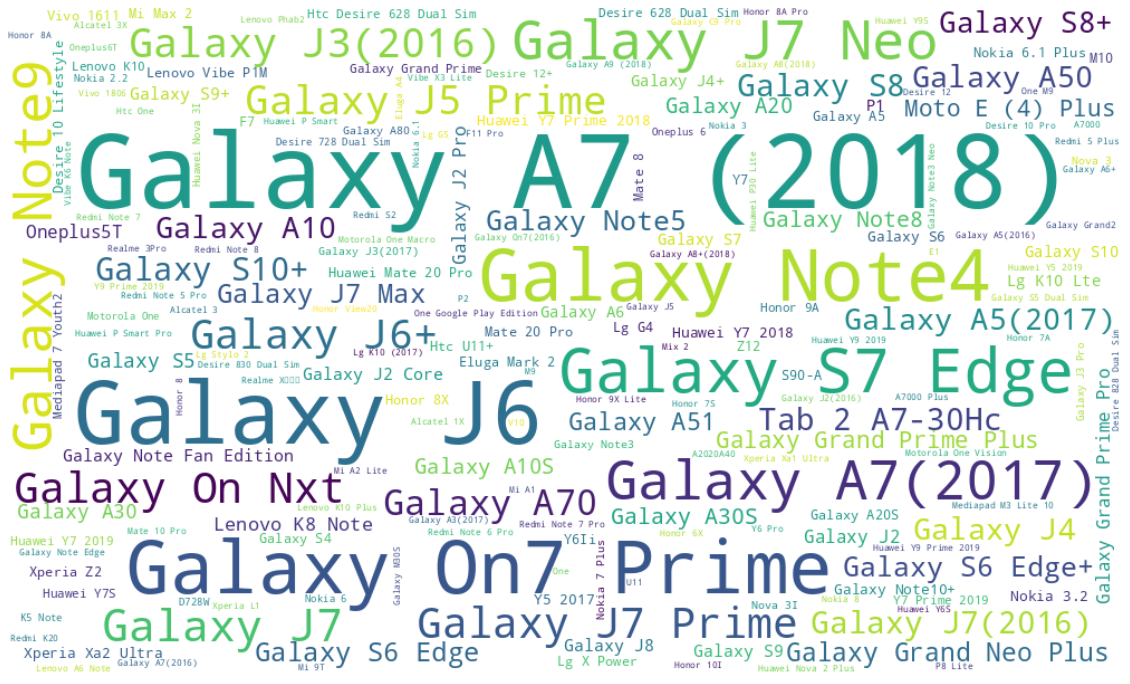

In [32]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data_invalid["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a wordcloud of the invalid RSRP values devices.
For the most part devices are with same distribution.

# Plotting:
We should plot this data in a better way without overplotting or undersampling. This can be achieved using the holoviews ecosystem with its libraries like datashader, holoviews.pandas, hvplot and colorcet

In [33]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
RSRP_data_time_sorted = RSRP_data.sort_values(by="Timestamp", ignore_index=True)
# RSRP_data_valid_time_sorted = RSRP_data_valid_time_sorted.set_index("Timestamp")
RSRP_data_time_sorted.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0 2019-11-01 18:15:32.097000+00:00         24.639421           46.73017   
1 2019-11-01 18:15:32.505000+00:00         24.639421           46.73017   
2 2019-11-01 18:15:50.376000+00:00         24.639421           46.73017   
3 2019-11-01 18:20:11.389000+00:00         24.639421           46.73017   
4 2019-11-01 18:20:12.035000+00:00         24.639421           46.73017   
5 2019-11-01 18:20:13.264000+00:00         24.639421           46.73017   
6 2019-11-01 18:20:16.996000+00:00         24.639421           46.73017   
7 2019-11-01 18:21:45.695000+00:00         24.639421           46.73017   
8 2019-11-01 18:22:37.206000+00:00         24.639421           46.73017   
9 2019-11-01 18:36:43.521000+00:00         24.626589           46.68925   

  RadioConnectionType RadioNetworkGeneration RadioOperatorName        RSRP  \
0              Mobile                     4G        Operator B        -110   
1              Mobile                     4G        Operator B        -106   
2              Mobile                     4G        Operator B         -93   
3              Mobile                     4G        Operator B        -107   
4              Mobile                     4G        Operator B        -111   
5              Mobile                     4G        Operator B        -106   
6              Mobile                     3G        Operator B  2147483647   
7              Mobile                     3G        Operator B  2147483647   
8              Mobile                     4G        Operator B         -98   
9              Mobile                     4G        Operator C         -95   

  RadioMobileDataEnabled DeviceManufacturer               DeviceName  
0                Enabled            SAMSUNG           Galaxy S7 Edge  
1                Enabled            SAMSUNG           Galaxy S7 Edge  
2                Enabled            SAMSUNG           Galaxy S7 Edge  
3                Enabled            SAMSUNG           Galaxy S7 Edge  
4                Enabled            SAMSUNG           Galaxy S7 Edge  
5                Enabled            SAMSUNG           Galaxy S7 Edge  
6                Enabled            SAMSUNG           Galaxy S7 Edge  
7                Enabled            SAMSUNG           Galaxy S7 Edge  
8                Enabled            SAMSUNG           Galaxy S7 Edge  
9                Enabled            SAMSUNG  Galaxy Grand Prime Plus

In [34]:
df = RSRP_data.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [36]:
# Using the map tiles provided by Esri. OpenStreetMaps can be used as well
# map_tiles = EsriImagery().opts( alpha=0.3, width=1000, height=700, bgcolor='black')

# users_points = hv.Points(RSRP_data_houred, ['LocationLongitude', 'LocationLatitude'])
# # downsampling using datashader
# users_points_downsampled = datashade(users_points, cmap=cc.fire, width=1000, height=700)

# # plotting the points over a map provided by the tiles elements 
# map_tiles * users_points_downsampled

# plot = RSRP_data_houred.hvplot.scatter("LocationLongitude",
#                                 "LocationLatitude",
#                                 rasterize=True,
#                                 cmap=cc.fire,
#                                 cnorm='eq_hist',
#                                 colorbar=False,
#                                 xaxis=None,
#                                 yaxis=None,
#                                 )
# map_tiles * plot 

# pointsA =  hv.Points(df[df["RadioOperatorName"] == "Operator A"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterA = hv.operation.datashader.rasterize(pointsA).opts(cmap=cc.kr, cnorm="eq_hist", width=1000)
# highlightA = hv.operation.datashader.inspect(rasterA).opts(marker="o", size=10, fill_alpha=0, color='red', tools=["hover"])4
    
# pointsB =  hv.Points(df[df["RadioOperatorName"] == "Operator B"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterB = hv.operation.datashader.rasterize(pointsB).opts(cmap=cc.kb, cnorm="eq_hist", width=1000)
# highlightB = hv.operation.datashader.inspect(rasterB).opts(marker="o", size=10, fill_alpha=0, color='green', tools=["hover"])

# pointsC =  hv.Points(df[df["RadioOperatorName"] == "Operator C"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterC = hv.operation.datashader.rasterize(pointsC).opts(cmap=cc.kg, cnorm="eq_hist", width=1000)
# highlightC = hv.operation.datashader.inspect(rasterC).opts(marker="o", size=10, fill_alpha=0, color='blue', tools=["hover"])

# esri  * rasterB * highlightB * rasterC * highlightC* rasterA * highlightA

esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS = {"Operator A": cc.kr, "Operator B": cc.kg, "Operator C": cc.kb}

def operator_map(operator_name):
    df_operator = df[df["RadioOperatorName"] == operator_name].copy()
    if (len(df_operator) == 0 ):
        return esri
    operator_points =  hv.Points(df_operator, kdims=["LocationLongitude", "LocationLatitude"])
    rastered = rasterize(operator_points).opts(cmap=COLORS[operator_name], cnorm="eq_hist",  width=1000, height=700)
    operator_highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
    return esri * rastered * operator_highlight
    
operator_select = pn.widgets.RadioButtonGroup(options=list(COLORS.keys()))
interactive = pn.bind(operator_map, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

Column
    [0] RadioButtonGroup(options=['Operator A', ...], value='Operator A')
    [1] ParamFunction(function)

In this map we can see the how speard every operator users are and which areas are a hotspot, <span style="color:red">*Operator A*</span> is show in <span style="color:red">*red*</span>, <span style="color:green">*Operator B*</span> is show in <span style="color:green">*green*</span>, <span style="color:blue">*Operator C*</span> is show in <span style="color:blue">*blue*</span>.

In [37]:
esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
color_key ={"Operator A":"red", "Operator B": "green", "Operator C": "blue"}

points =  hv.Points(df, kdims=["LocationLongitude", "LocationLatitude"])
rastered = rasterize(points).opts(cmap=cc.fire, cnorm="eq_hist", width=1000, height=700)
highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
esri  * rastered * highlight 

:DynamicMap   []
   :Overlay
      .Tiles.I  :Tiles   [Longtitude,Latitude]
      .Image.I  :Image   [LocationLongitude,LocationLatitude]   (LocationLongitude_LocationLatitude Count)
      .Points.I :Points   [LocationLongitude,LocationLatitude]   (Timestamp,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName)

This is a plot of the whole dataset we have for all the operators over the whole period we have.

After cleaning the data is better to save it in a new file, so we don't have to go through all of this processing again if we needed to do more processing.
I'll use a better format than CSV called Parquet, it's built-in pandas only requires the installation of fastparquet library.

In [ ]:
RSRP_data.to_parquet("RSRP_data.parq")
RSRP_data_time_sorted.to_parquet("RSRP_data_time_sorted.parq")

In [76]:
RSRP_data_viz = pd.read_parquet("Dashboard/RSRP_data_viz.parq")

In [77]:
RSRP_data_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     category           
 4   RadioNetworkGeneration  category           
 5   RadioOperatorName       category           
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  category           
 8   DeviceManufacturer      category           
 9   DeviceName              category           
dtypes: category(6), datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 101.4 MB


In [78]:
RSRP_data_viz["Timestamp"]

0         2019-11-01 21:09:29.386000+00:00
1         2019-11-01 21:09:29.386000+00:00
2         2019-11-01 21:10:45.323000+00:00
3         2019-11-01 21:10:45.323000+00:00
4         2019-11-01 21:11:26.822000+00:00
                        ...               
2725348   2019-11-03 19:30:32.181000+00:00
2725349   2019-11-03 19:33:39.525000+00:00
2725350   2019-11-03 11:36:57.390000+00:00
2725351   2019-11-03 14:02:08.409000+00:00
2725352   2019-11-03 15:05:05.029000+00:00
Name: Timestamp, Length: 2725353, dtype: datetime64[ns, UTC]

In [63]:
RSRP_data_houred["Timestamp"] = RSRP_data_time_sorted["Timestamp"]

In [79]:
COLS = ["RadioConnectionType", "RadioNetworkGeneration", "RadioOperatorName", "RadioMobileDataEnabled", "DeviceManufacturer", "DeviceName"]
RSRP_data_viz[COLS] = RSRP_data_viz[COLS].astype('category')

In [80]:
RSRP_data_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     category           
 4   RadioNetworkGeneration  category           
 5   RadioOperatorName       category           
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  category           
 8   DeviceManufacturer      category           
 9   DeviceName              category           
dtypes: category(6), datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 101.4 MB


In [73]:
RSRP_data_viz.to_parquet("Dashboard/RSRP_data_viz.parq")

In [85]:
RSRP_data_viz["Timestamp"].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
2725348    3
2725349    3
2725350    3
2725351    3
2725352    3
Name: Timestamp, Length: 2725353, dtype: int64

In [83]:
RSRP_data_time_sorted

Timestamp  LocationLatitude  LocationLongitude  \
0       2019-11-01 18:15:32.097000+00:00         24.639421          46.730170   
1       2019-11-01 18:15:32.505000+00:00         24.639421          46.730170   
2       2019-11-01 18:15:50.376000+00:00         24.639421          46.730170   
3       2019-11-01 18:20:11.389000+00:00         24.639421          46.730170   
4       2019-11-01 18:20:12.035000+00:00         24.639421          46.730170   
...                                  ...               ...                ...   
2725348 2019-11-04 20:59:59.001000+00:00         24.805227          46.625134   
2725349 2019-11-04 20:59:59.014000+00:00         24.650938          46.493584   
2725350 2019-11-04 20:59:59.074000+00:00         24.630741          46.718960   
2725351 2019-11-04 20:59:59.398000+00:00         24.739864          46.671146   
2725352 2019-11-04 20:59:59.414000+00:00         24.596611          46.680550   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
0                    Mobile                     4G        Operator B   
1                    Mobile                     4G        Operator B   
2                    Mobile                     4G        Operator B   
3                    Mobile                     4G        Operator B   
4                    Mobile                     4G        Operator B   
...                     ...                    ...               ...   
2725348              Mobile                     4G        Operator A   
2725349              Mobile                     3G        Operator A   
2725350              Mobile                     4G        Operator A   
2725351              Mobile                     4G        Operator A   
2725352              Mobile                     4G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
0              -110                Enabled            SAMSUNG   
1              -106                Enabled            SAMSUNG   
2               -93                Enabled            SAMSUNG   
3              -107                Enabled            SAMSUNG   
4              -111                Enabled            SAMSUNG   
...             ...                    ...                ...   
2725348         -73                Enabled            SAMSUNG   
2725349  2147483647                Enabled            SAMSUNG   
2725350         -95                Enabled            SAMSUNG   
2725351         -90                Enabled            SAMSUNG   
2725352        -107                Enabled            SAMSUNG   

                    DeviceName  
0               Galaxy S7 Edge  
1               Galaxy S7 Edge  
2               Galaxy S7 Edge  
3               Galaxy S7 Edge  
4               Galaxy S7 Edge  
...                        ...  
2725348         Galaxy S7 Edge  
2725349  Galaxy Grand Neo Plus  
2725350             Galaxy A10  
2725351              Galaxy S9  
2725352           Galaxy Note8  

[2725353 rows x 10 columns]

In [84]:
RSRP_data

Timestamp  LocationLatitude  LocationLongitude  \
0       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
1       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
2       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
3       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
4       2019-11-01 21:11:26.822000+00:00         24.540540          46.784737   
...                                  ...               ...                ...   
2725348 2019-11-03 19:30:32.181000+00:00         24.812230          46.752800   
2725349 2019-11-03 19:33:39.525000+00:00         24.812230          46.752800   
2725350 2019-11-03 11:36:57.390000+00:00         24.773191          46.654728   
2725351 2019-11-03 14:02:08.409000+00:00         24.774273          46.773990   
2725352 2019-11-03 15:05:05.029000+00:00         24.774136          46.774260   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
0                    Mobile                     4G        Operator C   
1                    Mobile                     4G        Operator C   
2                    Mobile                     3G        Operator C   
3                    Mobile                     3G        Operator C   
4                    Mobile                     4G        Operator C   
...                     ...                    ...               ...   
2725348              Mobile                     4G        Operator A   
2725349              Mobile                     4G        Operator A   
2725350                WiFi                     4G        Operator A   
2725351              Mobile                     4G        Operator A   
2725352              Mobile                     4G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
0        2147483647                Enabled                HTC   
1        2147483647                Enabled                HTC   
2        2147483647                Enabled                HTC   
3        2147483647                Enabled                HTC   
4        2147483647                Enabled                HTC   
...             ...                    ...                ...   
2725348         -81                Enabled            SAMSUNG   
2725349         -90                Enabled            SAMSUNG   
2725350         -99                Enabled             HUAWEI   
2725351        -111                Enabled             HUAWEI   
2725352         -88                Enabled             HUAWEI   

                  DeviceName  
0                      D728W  
1        Desire 728 Dual Sim  
2                      D728W  
3        Desire 728 Dual Sim  
4                      D728W  
...                      ...  
2725348          Galaxy A20S  
2725349          Galaxy A20S  
2725350               Mate 8  
2725351               Mate 8  
2725352               Mate 8  

[2725353 rows x 10 columns]